**Fake News Classification with Decision Tree**

**Load and Prepare Data**

In [14]:
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



def load_data(real_path, fake_path):
    with open(real_path, "r", encoding="utf-8") as f:
        real_headlines = f.readlines()
    with open(fake_path, "r", encoding="utf-8") as f:
        fake_headlines = f.readlines()
    headlines = real_headlines + fake_headlines
    labels = [1] * len(real_headlines) + [0] * len(fake_headlines)

    return headlines, labels

if __name__ == '__main__':
    real_path = "/content/real.txt"
    fake_path = "/content/fake.txt"

headlines, labels = load_data(real_path, fake_path)
print(f"Loaded {len(headlines)} headlines: {sum(labels)} real and {len(labels)-sum(labels)} fake.")

Loaded 3266 headlines: 1968 real and 1298 fake.


**Preprocessing the Text Data**


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(headlines)

X_train, X_temp, y_train, y_temp = train_test_split(X, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")


Training Set: (2286, 5000), Validation Set: (490, 5000), Test Set: (490, 5000)


**Train the Decision Tree Classifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_depth = None
best_acc = 0
results = []

for depth in [2, 5, 10, 20, 50]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    val_acc = accuracy_score(y_val, clf.predict(X_val))

    results.append((depth, val_acc))
    print(f"max_depth={depth}, Validation Accuracy={val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_depth = depth

clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)
test_acc = accuracy_score(y_test, clf_best.predict(X_test))

print(f"Test Accuracy (best_depth={best_depth}): {test_acc:.4f}")


max_depth=2, Validation Accuracy=0.6224
max_depth=5, Validation Accuracy=0.6347
max_depth=10, Validation Accuracy=0.6592
max_depth=20, Validation Accuracy=0.6837
max_depth=50, Validation Accuracy=0.7184
Test Accuracy (best_depth=50): 0.7551


**Results & Analysis**

In [18]:
print(f"Best max_depth: {best_depth}, Test Accuracy: {test_acc:.4f}")

important_features = clf_best.feature_importances_
feature_names = vectorizer.get_feature_names_out()

top_features = sorted(zip(important_features, feature_names), reverse=True)[:10]
print("Top 10 important words in decision making:")
for score, word in top_features:
    print(f"{word}: {score:.4f}")


Best max_depth: 50, Test Accuracy: 0.7551
Top 10 important words in decision making:
donald: 0.0965
hillary: 0.0802
trumps: 0.0521
trump: 0.0255
just: 0.0253
comment: 0.0174
korea: 0.0172
breaking: 0.0160
turnbull: 0.0147
black: 0.0147


**Visualizing the Decision Tree**

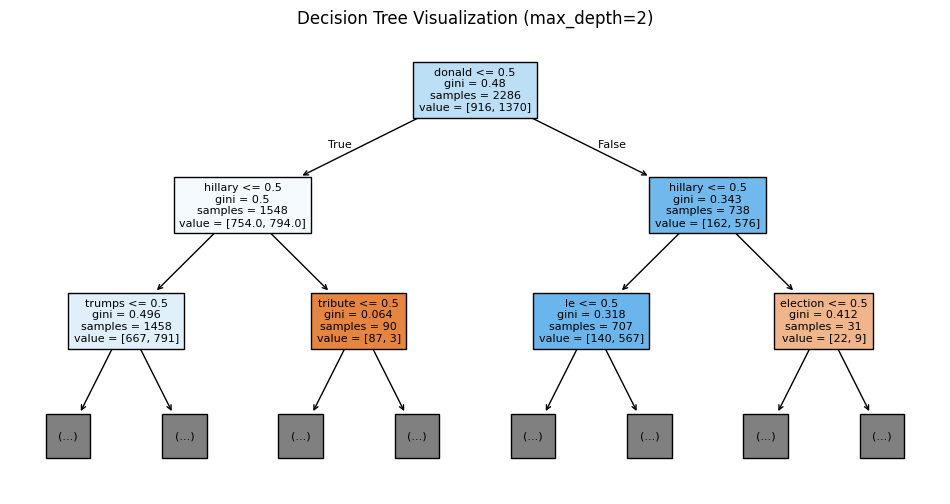

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(clf_best, feature_names=vectorizer.get_feature_names_out(), max_depth=2, fontsize=8, filled=True)
plt.title("Decision Tree Visualization (max_depth=2)")
plt.show()
